In [71]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import math

from src.processing.txt_loading import txt_to_list
from src.processing.characterise_biofilm import characterise_both_biofilm_images, characterise_biofilm_image
from src.processing.constants import BUCKLING_PATH, EDGE_TRACKING_PATH
from src.processing.labelled_regions import label_regions, characterise_regions
from src.processing.histogram_processing import nth_histogram_percentile
from src.processing.radial import create_radius_select_stack

In [72]:
bright_img = imread(str(BUCKLING_PATH / "200920_normallight_nobg_edges_gaussblur_enhance_inverted.tif"))
bio_img = imread(str(BUCKLING_PATH / "200920_biolight_nobg_nooutliers_despeckle_enhance.tif"))

In [73]:
slice_no_bio = 120
slice_no_bright = int(slice_no_bio*1.403726708)

In [74]:
imageb = bio_img[slice_no_bio]
imagen = bright_img[slice_no_bright]

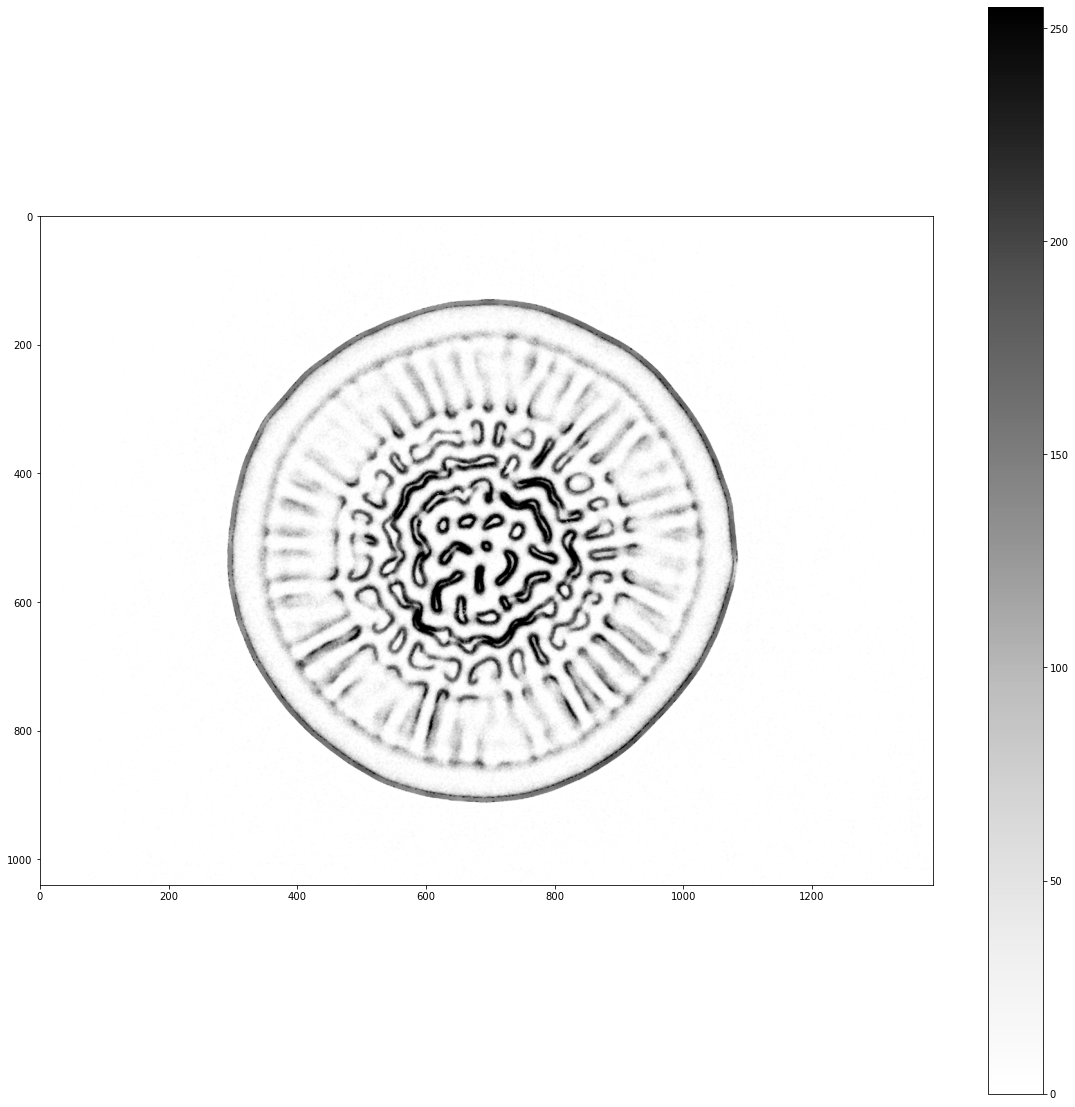

In [112]:
plt.figure(figsize=(20,20))
plt.imshow(imageb, cmap = 'Greys')
plt.colorbar()

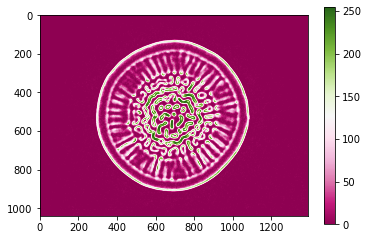

In [120]:
#plt.figure(figsize=(20,20))
plt.imshow(imageb, cmap = 'PiYG')
plt.colorbar()

In [75]:
timestamps_b, radii_b, x_center_b, y_center_b = txt_to_list(str(EDGE_TRACKING_PATH/'200920_biolight_fitted_circle_position_data.txt'))
x_center, y_center = x_center_b[120], y_center_b[120]

centre_fitted = (x_center, y_center)

In [76]:
y, x = np.indices((imageb.shape))
pixel_radius = np.sqrt((x - centre_fitted[0])**2 + (y - centre_fitted[1])**2)  # calculate radii of all pixels from center (shape is same as data)

pixel_in_disk = (pixel_radius < 400)

disk_y_coords, disk_x_coords = np.where(pixel_in_disk)
disk_values = imageb[disk_y_coords, disk_x_coords]

In [77]:
disk_values

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

<BarContainer object of 256 artists>

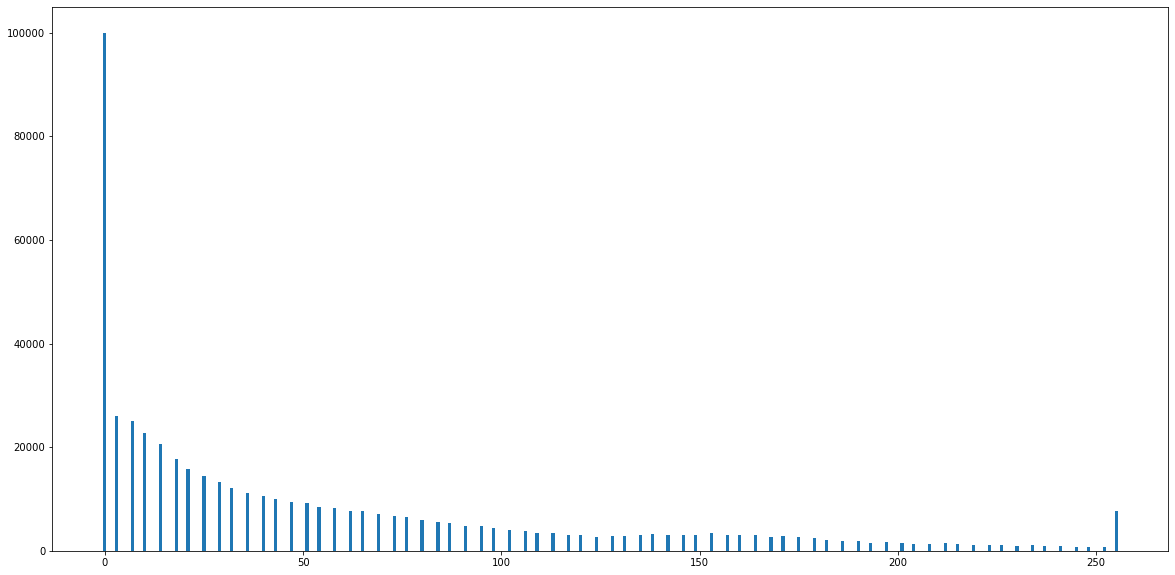

In [78]:
histogram = np.bincount(np.ravel(disk_values))
x = np.arange(0,len(histogram))
len(x)
plt.figure(figsize = (20,10))
plt.bar(x, histogram)

<BarContainer object of 256 artists>

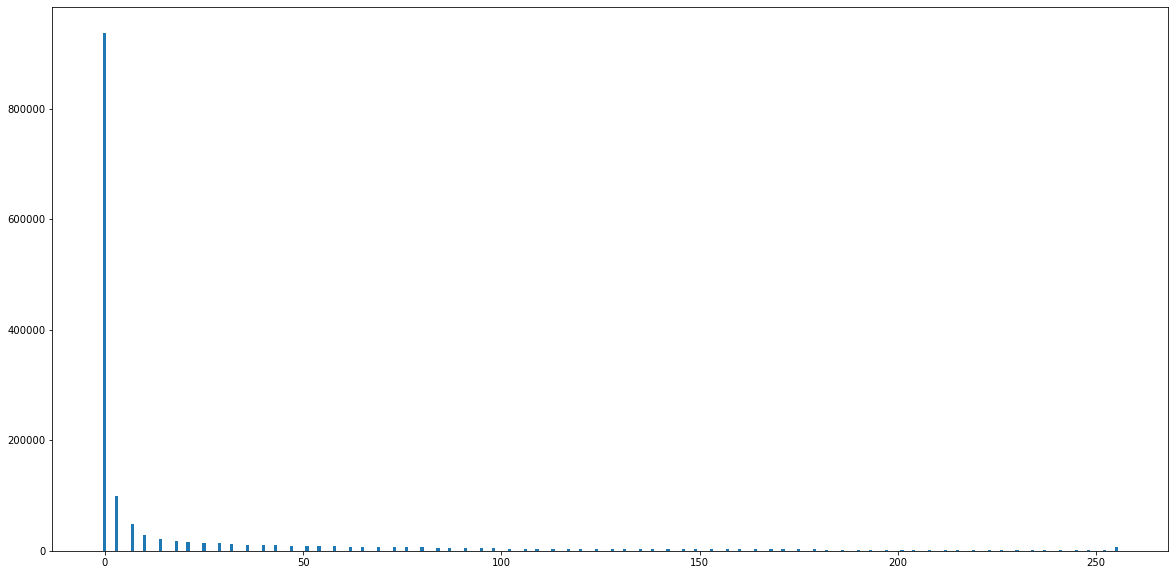

In [79]:
histogram = np.bincount(np.ravel(imageb))
x = np.arange(0,len(histogram))
len(x)
plt.figure(figsize = (20,10))
plt.bar(x, histogram)

In [80]:
print(nth_histogram_percentile(disk_values, 50))

29


In [81]:
print(nth_histogram_percentile(disk_values, 30))

7


In [115]:
pixel_vals = [7, 29, 157, 255]
stress_vals = [3.14423, 3.328686, 3.55046, 3.56]
coeff_qaudratic = np.polyfit(pixel_vals, stress_vals, 2)

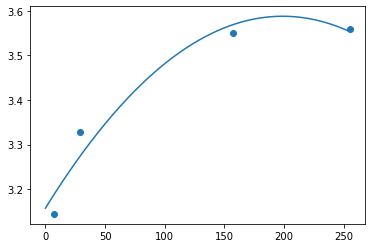

In [118]:
pixel_vals_full = np.arange(0,255,1)
f = np.polyval(coeff_qaudratic, pixel_vals_full)

plt.plot(pixel_vals_full, f)
plt.scatter(pixel_vals, stress_vals)

In [89]:
stress_img = np.polyval(coeff_qaudratic, bio_img[120])

In [102]:
np.polyval(coeff_qaudratic, 0)

3.1610812993501356

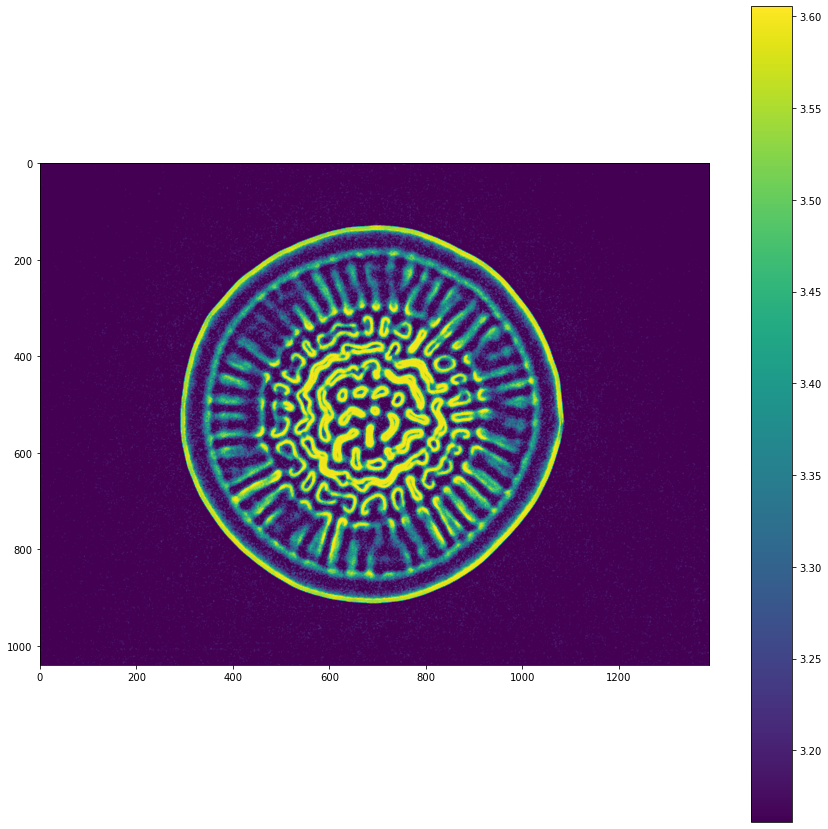

In [90]:
plt.figure(figsize = (15,15))
plt.imshow(stress_img)
plt.colorbar()

In [99]:
import mplcursors
from mpldatacursor import datacursor

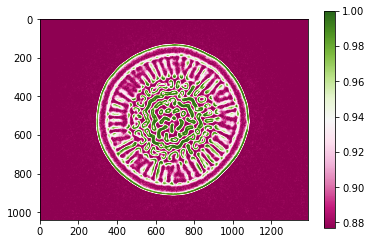

In [119]:
stress_img_norm = stress_img/np.max(stress_img)
#plt.figure(figsize = (30,30))
plt.imshow(stress_img_norm, cmap ='PiYG')
plt.colorbar()


#cursor = mplcursors.cursor(stress_img_norm, hover=False)
#@cursor.connect("add")
#mplcursors.cursor()
datacursor(display='single')

# def on_add(sel):
#     i,j = sel.target.index
#     #if A[i][j] == 0:
#      #   sel.annotation.set_visible(False)
#     #else:
#     #    sel.annotation.set_text(f'P: {j}\nN: {i}\n{A[i][j]:.3f}')
#     sel.annotation.set_text(f'{stress_img_norm[i,j]:.3f}')
plt.show()

In [11]:
np.min(imageb)

0

In [55]:
max_pixel_value = np.max(imagen)
imagen_normalized = imagen/max_pixel_value

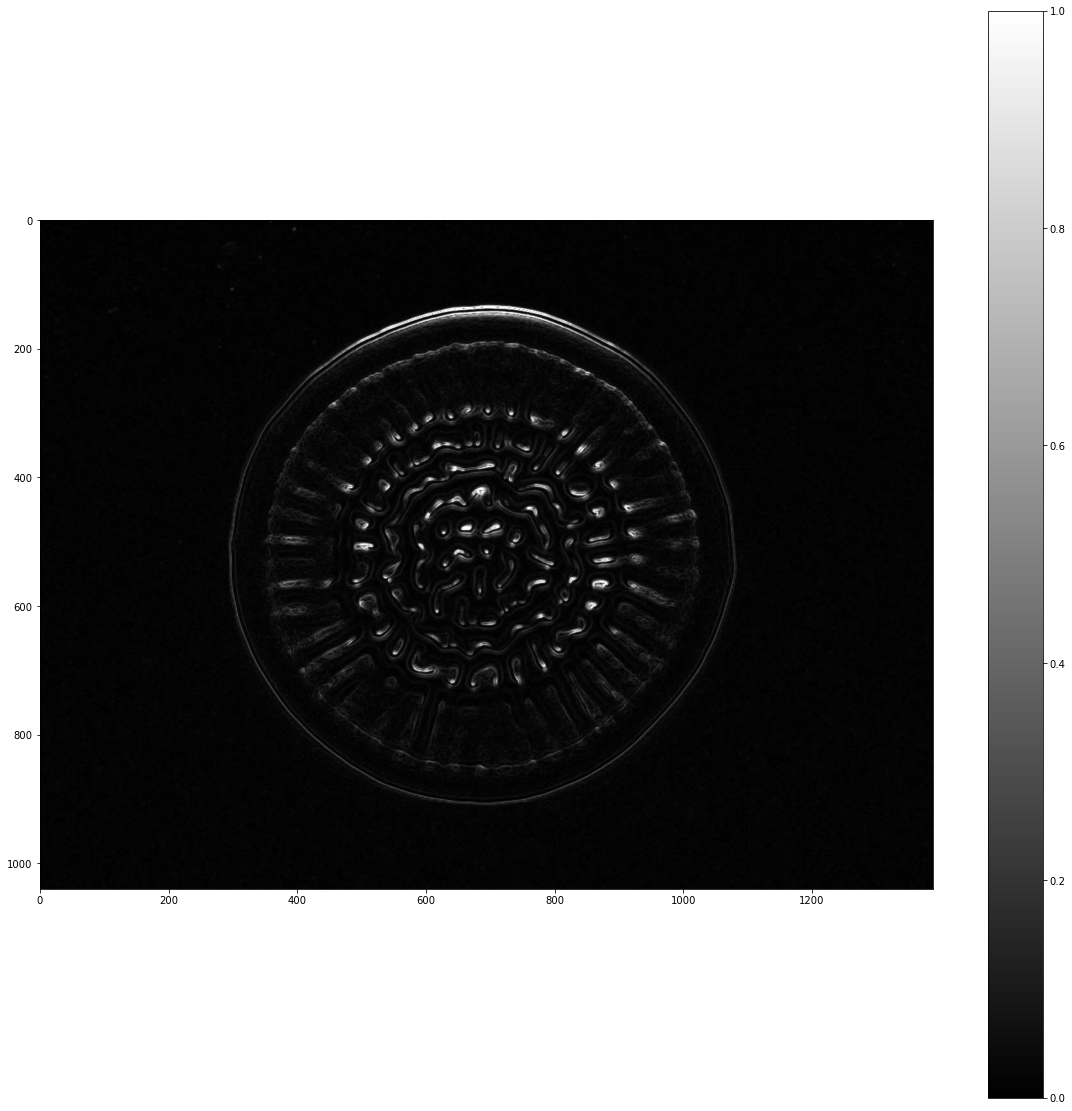

In [56]:
plt.figure(figsize=(20,20))
plt.imshow(imagen_normalized, cmap = 'gray')
plt.colorbar()

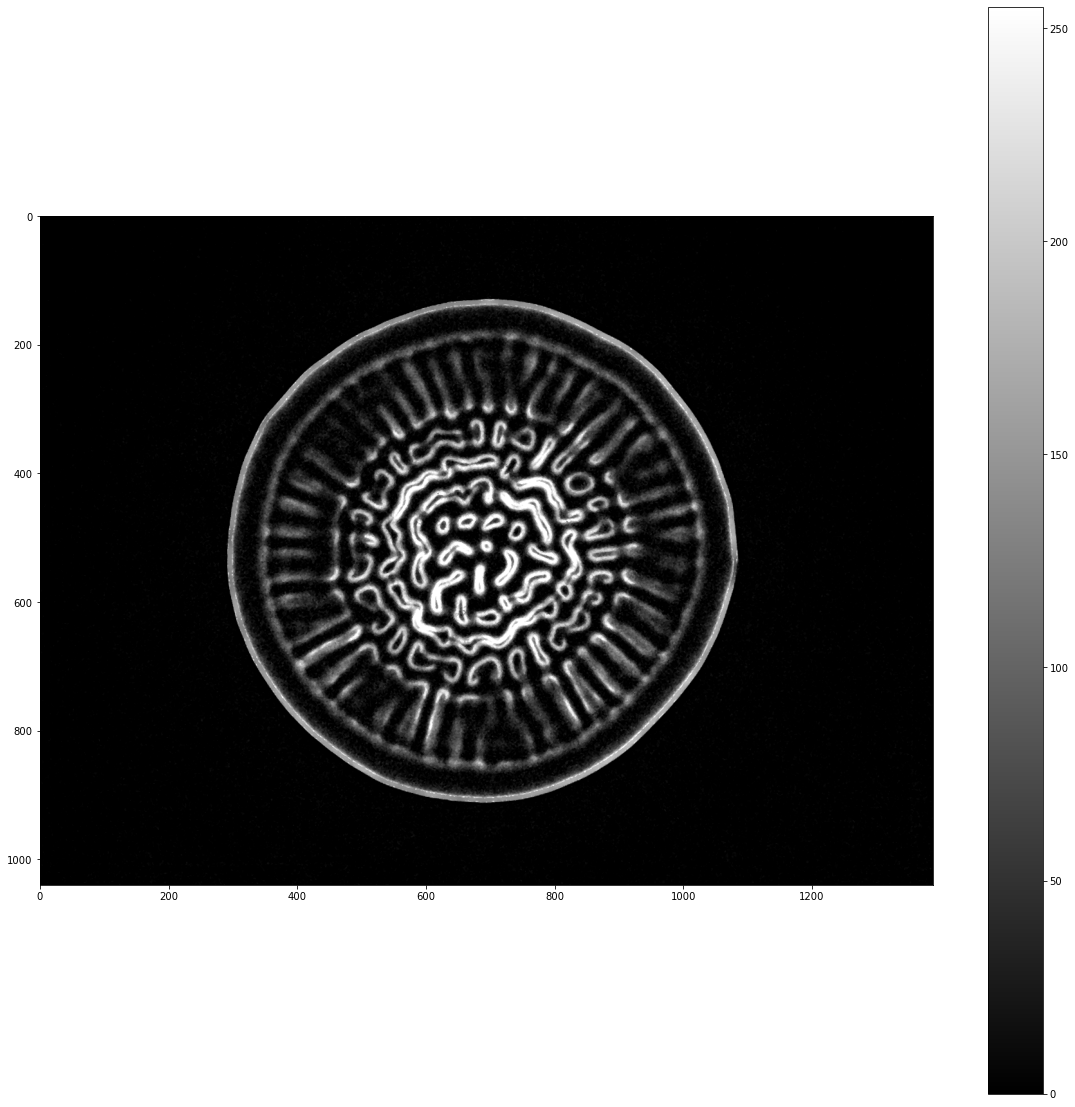

In [57]:
plt.figure(figsize=(20,20))
plt.imshow(imageb, cmap = 'gray')
plt.colorbar()

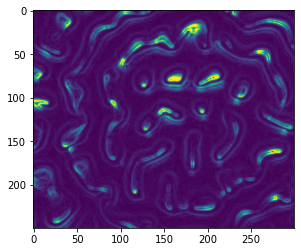

In [58]:
plt.imshow(imagen_normalized[400:650, 500:800])

In [59]:
heights = np.ravel(imagen_normalized[400:650, 500:800])
light = np.ravel(imageb[400:650, 500:800])

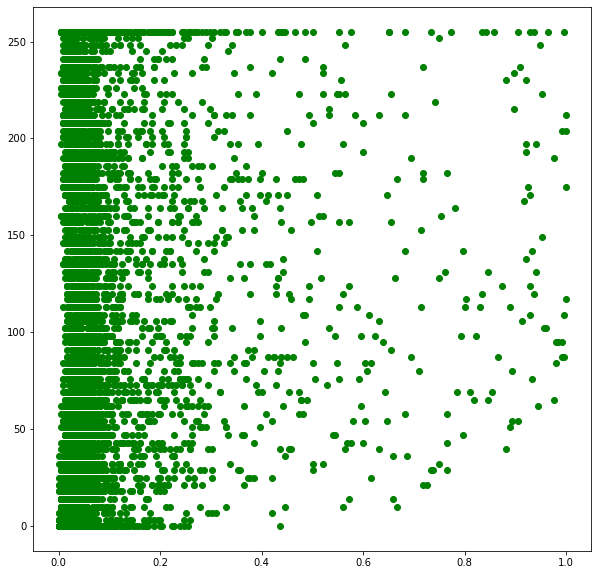

In [60]:
plt.figure(figsize=(10,10))
plt.plot(heights[::10], light[::10], 'go')